## Titanic Dataset Analysis with Machine Learning

This task involves analyzing the Titanic dataset using logistic regression and decision tree models. The tasks include evaluating logistic regression with cross-validation, analyzing overfitting and underfitting in decision trees, calculating precision, recall, and F1-score, plotting the ROC curve, and comparing model performance with and without cross-validation.

#### Step 1: Load the Dataset

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 2: Preprocess the Dataset

In [16]:
# Identify numerical and categorical columns
numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Define preprocessing for numerical features: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the target and features
X = data.drop(columns=['Survived'])
y = data['Survived']

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)


### Task 1: Evaluating Logistic Regression with Cross-Validation

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define the logistic regression model within a pipeline
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression(max_iter=1000))])

# Evaluate the model using 5-fold cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Cross-Validation Accuracy: Mean = {:.4f}, Std Dev = {:.4f}".format(mean_cv_score, std_cv_score))


Cross-Validation Accuracy: Mean = 0.7890, Std Dev = 0.0148


### Task 2: Analyzing Overfitting and Underfitting in Decision Trees

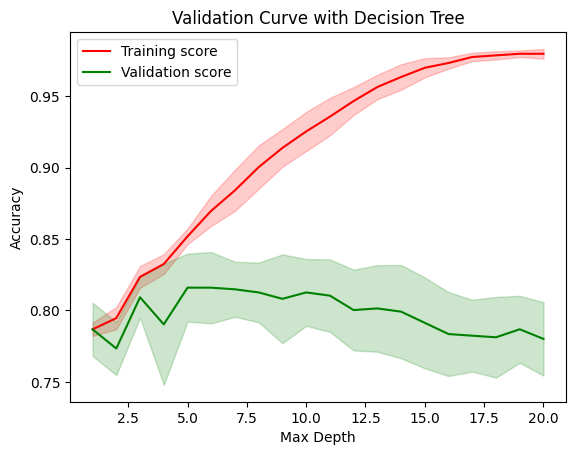

In [18]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Define the model
tree = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', DecisionTreeClassifier())])

# Define the range of depths to test
param_range = range(1, 21)

# Calculate training and validation accuracies for different depths
train_scores, test_scores = validation_curve(
    tree, X, y, param_name='classifier__max_depth', param_range=param_range, cv=5, scoring='accuracy')

# Calculate mean and standard deviation for training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot the training and validation accuracies
plt.plot(param_range, train_mean, label='Training score', color='r')
plt.plot(param_range, test_mean, label='Validation score', color='g')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='g')

plt.title('Validation Curve with Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


### Task 3: Calculating Precision, Recall, and F1-Score for Logistic Regression

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg.fit(X_train, y_train)

# Predict the labels
y_pred = logreg.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))


Precision: 0.7571
Recall: 0.7162
F1-Score: 0.7361


### Task 4: ROC Curve Analysis for Decision Trees

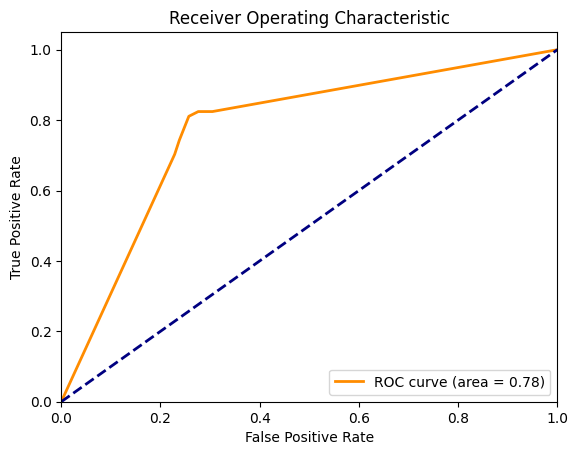

In [20]:
from sklearn.metrics import roc_curve, auc

# Train the decision tree model
tree.fit(X_train, y_train)

# Predict probabilities
y_probs = tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### Task 5: Comparing Model Performance with and without Cross-Validation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train logistic regression and decision tree models without cross-validation
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Predict labels for test set
logreg_pred = logreg.predict(X_test)
tree_pred = tree.predict(X_test)

# Calculate accuracy, precision, and recall for both models
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)

tree_accuracy = accuracy_score(y_test, tree_pred)
tree_precision = precision_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred)

# Print the results
print("Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}".format(logreg_accuracy, logreg_precision, logreg_recall))
print("Decision Tree - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}".format(tree_accuracy, tree_precision, tree_recall))


Logistic Regression - Accuracy: 0.7877, Precision: 0.7571, Recall: 0.7162
Decision Tree - Accuracy: 0.7542, Precision: 0.6829, Recall: 0.7568
